# 設定
- とある酒屋の見習いデータサイエンティストとして仮定しています。<br>
- A酒屋中野店の店長から「**お店の売上が落ちているからデータを分析して売上回復に向けた提案をして貰えないか？**」と相談を受けたと仮定します。<br>

## 目次
    1. 課題の絞り込み
    2. 原因の絞り込み

In [1]:
# 必要なライブラリーをインポート
import pandas as pd
import numpy as np

# 可視化
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
import seaborn as sns

## ➀課題の絞り込み
### 分析方針の整理

![スクリーンショット 2024-06-10 094124.png](<attachment:スクリーンショット 2024-06-10 094124.png>)
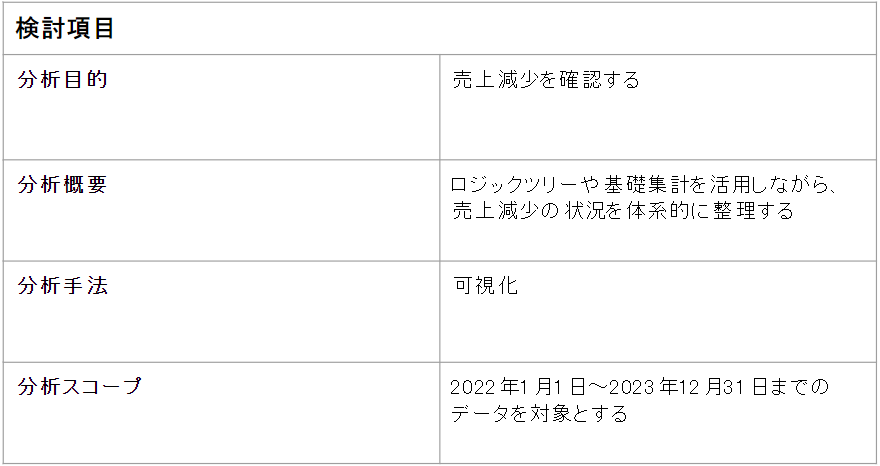

### データの整理
今回使うデータを表のようにまとめました。

![スクリーンショット 2024-06-11 084654.png](<attachment:スクリーンショット 2024-06-11 084654.png>)
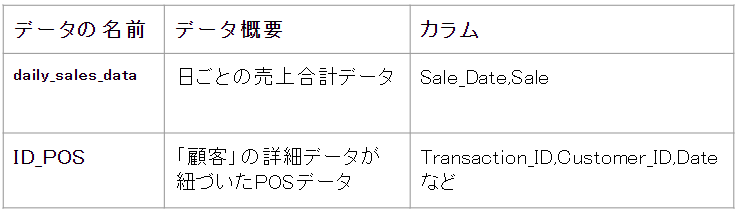

売上減少の確認

In [2]:
# データの読み込み
df_daily_sale = pd.read_csv('./data/daily_sales_data.csv')

# データの確認
df_daily_sale.head()

,Sale_Date,Sale
0,2022-01-01,884110
1,2022-01-02,268036
2,2022-01-03,603833
3,2022-01-04,416634
4,2022-01-05,945646


In [3]:
# 基本統計量の確認
df_daily_sale.describe()

,Sale
count,730.000000
mean,420776.926027
std,246112.151871
min,101389.000000
25%,227090.250000
50%,363726.000000
75%,556730.250000
max,999532.000000


<AxesSubplot: ylabel='Frequency'>

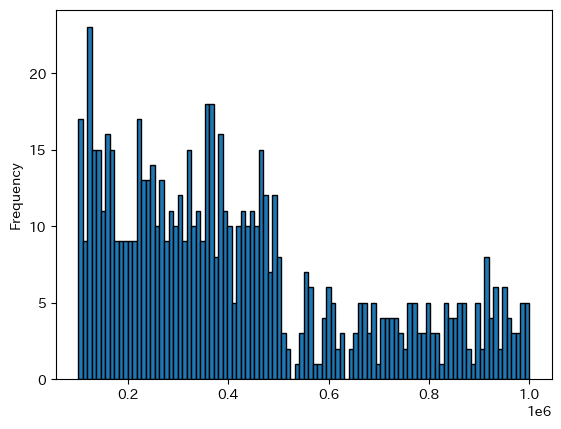

In [4]:
# ヒストグラムの描画
df_daily_sale['Sale'].plot(kind='hist', bins=100, edgecolor='black')

In [5]:
# 欠損値の確認
df_daily_sale.isnull().sum()

Sale_Date    0
Sale         0
dtype: int64

In [6]:
df_daily_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sale_Date  730 non-null    object
 1   Sale       730 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


データ分析の前処理

In [7]:
# 'Sale_Date'列を日付型に変換
df_daily_sale['Sale_Date'] = pd.to_datetime(df_daily_sale['Sale_Date'])

# 変数の確認
df_daily_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Sale_Date  730 non-null    datetime64[ns]
 1   Sale       730 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


売上の推移を確認

In [8]:
# 日ごとのばらつきが小さくなる為、移動平均を取って推移を確認
# 日付をインデックスに設定
df_daily_sale.set_index('Sale_Date', inplace=True)

# 移動平均を計算
df_daily_sale['Moving_Average'] = df_daily_sale['Sale'].rolling(window=90).mean()

# 89~94行目を確認
df_daily_sale[88:93]

,Sale,Moving_Average
Sale_Date,,
2022-03-30,547458,NaN
2022-03-31,931256,544013.022222
2022-04-01,674774,541687.066667
2022-04-02,958604,549360.044444
2022-04-03,233257,545242.533333


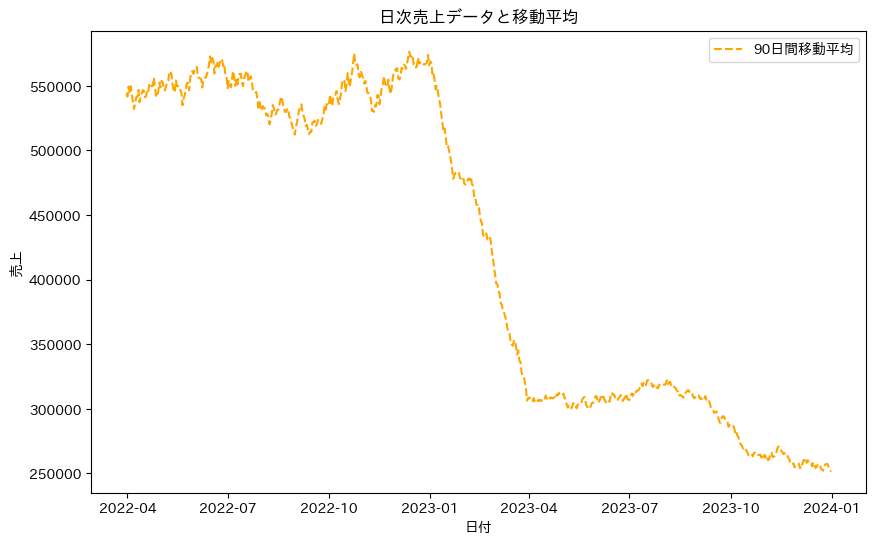

In [9]:
# 作成した移動平均をグラフで平均化し、2022年~2023年のトレンドを確認
# グラフで可視化
# グラフサイズの指定
plt.figure(figsize=(10, 6))

# グラフの描画
plt.plot(df_daily_sale['Moving_Average'], label='90日間移動平均', linestyle='--', color='orange')

# タイトル、ラベルの設定
plt.title('日次売上データと移動平均')
plt.xlabel('日付')
plt.ylabel('売上')

# 凡例を表示
plt.legend()

基礎集計結果やデータ前処理内容を表にまとめました

![スクリーンショット 2024-06-11 085453.png](<attachment:スクリーンショット 2024-06-11 085453.png>)
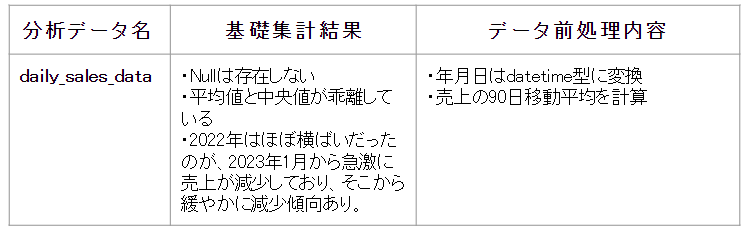